In [53]:
import tensorflow as tf
import keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [54]:

# Load and preprocess the image
img_path = 'Screenshot 2024-10-30 at 10.28.04 AM.png'  # Replace with your image path
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to your model's input size
img_array = keras.preprocessing.image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
img_tensor = keras.applications.vgg16.preprocess_input(img_array)  # Preprocess image for the specific model


In [55]:
model = keras.applications.vgg16.VGG16()
# model = keras.applications.inception_v3.InceptionV3()

## Visualize Filter Output


In [56]:
def show_filter(i):
    plt.imshow(model.layers[2].get_weights()[0][:,:,i,i], cmap='grey')

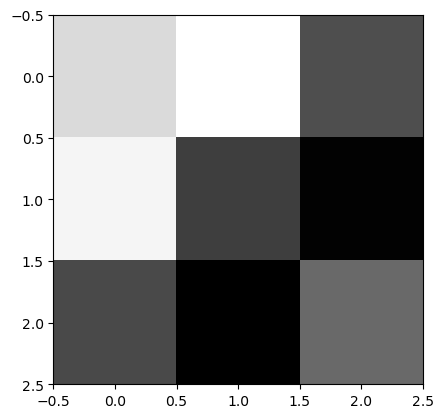

In [57]:
show_filter(0)

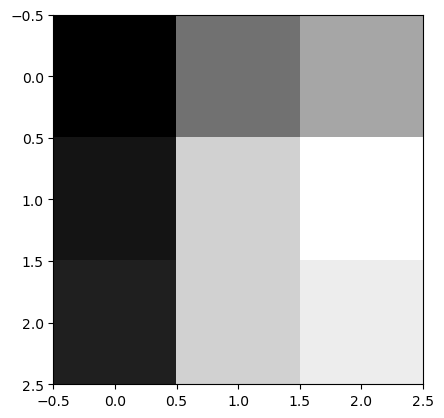

In [58]:
show_filter(1)

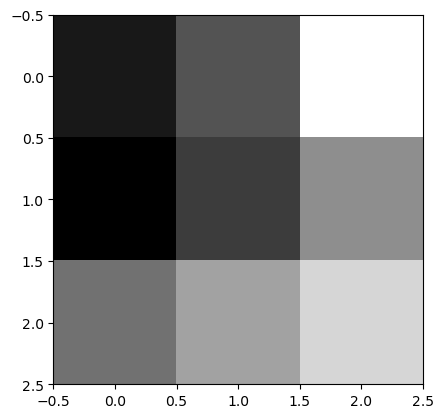

In [59]:
show_filter(2)

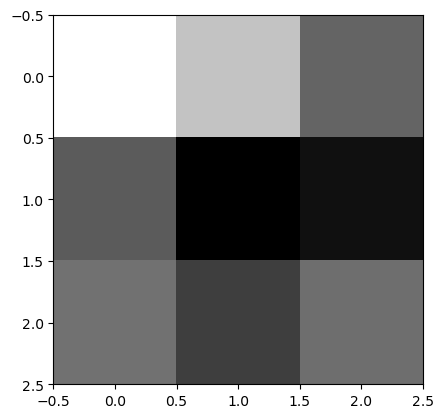

In [60]:
show_filter(3)

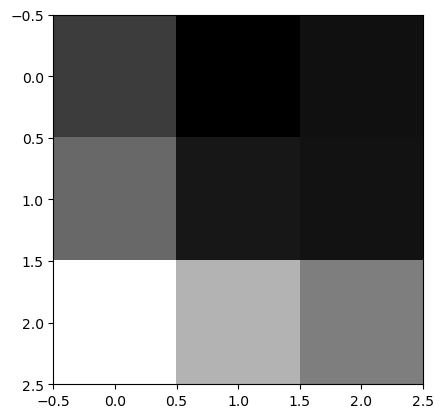

In [61]:
show_filter(4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Layer 2 activations shape: (1, 224, 224, 64)


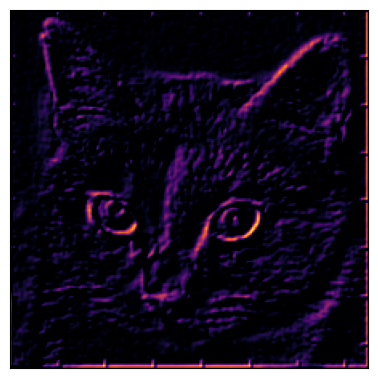

Layer 3 activations shape: (1, 224, 224, 64)


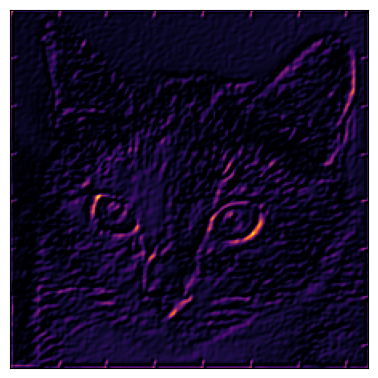

Layer 4 activations shape: (1, 112, 112, 64)


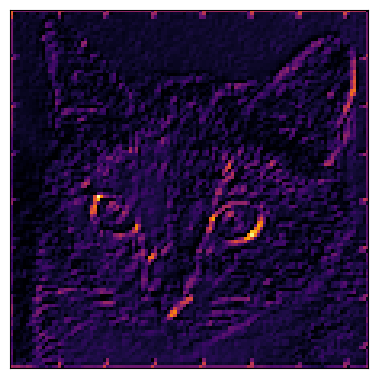

Layer 5 activations shape: (1, 112, 112, 128)


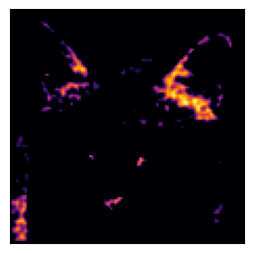

Layer 6 activations shape: (1, 112, 112, 128)


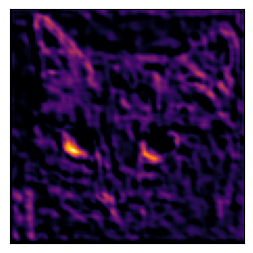

Layer 7 activations shape: (1, 56, 56, 128)


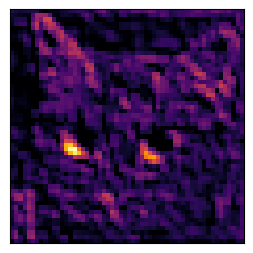

In [62]:
# Get the first 8 layers of the model
layer_outputs = [layer.output for layer in model.layers[:8]]

# Build a new model that only produces outputs for the 8 layers
activation_model = keras.models.Model(
  inputs=model.input,
  outputs=layer_outputs
)

# Get outputs of the first 8 layers
activations = activation_model.predict(img_tensor)

# Display activations for the first three layers
for layer_num in range(7)[1:]:  # Change to view more or fewer layers
  layer_activations = activations[layer_num]
  print(f"Layer {layer_num + 1} activations shape: {layer_activations.shape}")
  
  # Remove the batch dimension
  layer_activations = layer_activations[0]
  
  # Determine the grid size (e.g., 6x6 for 32 filters)
  num_filters = layer_activations.shape[-1]
  grid_size = int(np.ceil(np.sqrt(num_filters)))
  
  plt.figure(figsize=(30, 30))
  
  for i in range(num_filters)[:1]:
    ax = plt.subplot(grid_size, grid_size, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(layer_activations[:, :, i], cmap='inferno')
  
  plt.tight_layout()
  plt.show()


In [63]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)